# This notebook will show the implementation of NLP upon text reviews in our database of Amazon reviews. 

## We will explain each step and their results.

We import some of the main libraries we will work with:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now, let us upload the database and observe it:

In [2]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
#amazon_reviews

C:\Users\andre\AppData\Local\Temp\ipykernel_9324\2568999233.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")


In [3]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])

amazon_reviews.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


## The data is unevenly distributed along the ratings, we will solve this issue:

In [5]:
def random_select(df, n, rating, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column] == rating]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff

df3 = random_select(amazon_reviews, 400, 3, 'reviews.rating')
df4 = random_select(amazon_reviews, 350, 4, 'reviews.rating')
df5 = random_select(amazon_reviews, 1000, 5, 'reviews.rating')

In [6]:
df3.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,394.000000,400.0,0.0,0.0
mean,NaN,0.317259,3.0,NaN,NaN
std,NaN,1.485590,0.0,NaN,NaN
min,NaN,0.000000,3.0,NaN,NaN
25%,NaN,0.000000,3.0,NaN,NaN
50%,NaN,0.000000,3.0,NaN,NaN
75%,NaN,0.000000,3.0,NaN,NaN
max,NaN,22.000000,3.0,NaN,NaN


In [7]:
df4.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,349.000000,350.0,0.0,0.0
mean,NaN,0.209169,4.0,NaN,NaN
std,NaN,1.401693,0.0,NaN,NaN
min,NaN,0.000000,4.0,NaN,NaN
25%,NaN,0.000000,4.0,NaN,NaN
50%,NaN,0.000000,4.0,NaN,NaN
75%,NaN,0.000000,4.0,NaN,NaN
max,NaN,24.000000,4.0,NaN,NaN


In [8]:
df5.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,988.000000,1000.0,0.0,0.0
mean,NaN,0.341093,5.0,NaN,NaN
std,NaN,2.574533,0.0,NaN,NaN
min,NaN,0.000000,5.0,NaN,NaN
25%,NaN,0.000000,5.0,NaN,NaN
50%,NaN,0.000000,5.0,NaN,NaN
75%,NaN,0.000000,5.0,NaN,NaN
max,NaN,48.000000,5.0,NaN,NaN


In [9]:
df12 = amazon_reviews[amazon_reviews['reviews.rating'].isin([1, 2])]

In [10]:
df12.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,763.000000,812.000000,0.0,0.0
mean,NaN,4.982962,1.495074,NaN,NaN
std,NaN,29.055445,0.500284,NaN,NaN
min,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,0.000000,1.000000,NaN,NaN
50%,NaN,0.000000,1.000000,NaN,NaN
75%,NaN,1.000000,2.000000,NaN,NaN
max,NaN,422.000000,2.000000,NaN,NaN


Now, we observe that the columns we will work with are id (or name, they are correlated) and reviews.text. We will create a new database with these two and add a column based on the reviews.rating :

- 5 : good (2)
- 3, 4 : neutral (1)
- 1, 2 : bad

### Now let us create the final database we will actually work with:

In [11]:
amazon = pd.concat([df12, df3, df4, df5], ignore_index=True)
amazon.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,2494.000000,2562.000000,0.0,0.0
mean,NaN,1.738974,3.440281,NaN,NaN
std,NaN,16.307331,1.517227,NaN,NaN
min,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,0.000000,2.000000,NaN,NaN
50%,NaN,0.000000,4.000000,NaN,NaN
75%,NaN,0.000000,5.000000,NaN,NaN
max,NaN,422.000000,5.000000,NaN,NaN


## We now need to create the label:

In [12]:

def label(r):
    if r == 5.0:
        return 2
    elif r == 3.0 or r == 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)


# This will be the database for our Sentiment Analysis:

In [13]:
amazon = amazon[['id', 'reviews.text', 'reviews.rating', 'label']]
amazon.describe()

,reviews.rating,label
count,2562.000000,2562.000000
mean,3.440281,1.073380
std,1.517227,0.837944
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,1.000000
75%,5.000000,2.000000
max,5.000000,2.000000


## Let us observe how our database behaves:

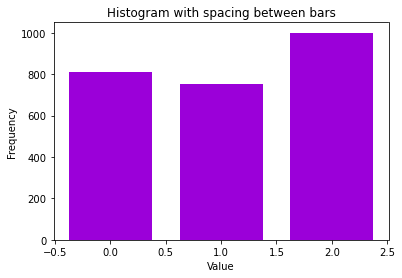

In [14]:
data = amazon['label']
min_bin = - 0.5
max_bin = 2.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

## Now, let us part our database in the three categories we have defined

In [15]:
good = amazon[amazon['label'] == 2]
neutral = amazon[amazon['label'] == 1]
bad = amazon[amazon['label'] == 0]

### In order to better visualise these, we can plot some wordclouds

In [16]:
!pip install wordcloud
from wordcloud import WordCloud

In [17]:
goods = good['reviews.text'].tolist()
goods = [str(x) for x in goods]
goods_sentence = " ".join(goods)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(goods_sentence))

ValueError: Only supported for TrueType fonts

<Figure size 1440x1440 with 0 Axes>

In [18]:
neutrals = neutral['reviews.text'].tolist()
neutrals = [str(x) for x in neutrals]
neutrals_sentence = " ".join(neutrals)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neutrals_sentence))

ValueError: Only supported for TrueType fonts

<Figure size 1440x1440 with 0 Axes>

In [19]:
bads = bad['reviews.text'].tolist()
bads = [str(x) for x in bads]
bads_sentence = " ".join(bads)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(bads_sentence))

ValueError: Only supported for TrueType fonts

<Figure size 1440x1440 with 0 Axes>

# Now it's time for some data cleaning!

## Punctuation

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# For good
g = []
for s in goods:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    g.append(s)
goods = g

In [22]:
# For neutral
n = []
for s in neutrals:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    n.append(s)
neutrals = n

In [23]:
# For bad
b = []
for s in bads:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    b.append(s)
bads = b

## Stopwords

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# For good
"""
g = []
for s in goods:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    g.append(s)

goods = g
"""

"\ng = []\nfor s in goods:\n    sentence = [word for word in s.split() if word not in stopwords.words('english')]\n    s = ' '.join(sentence)\n    g.append(s)\n\ngoods = g\n"

In [26]:
# For neutral
"""
n = []
for s in neutrals:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    g=n.append(s)

neutrals = n
"""

"\nn = []\nfor s in neutrals:\n    sentence = [word for word in s.split() if word not in stopwords.words('english')]\n    s = ' '.join(sentence)\n    g=n.append(s)\n\nneutrals = n\n"

In [27]:
# For bad
"""
b = []
for s in bads:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    b.append(s)

bads = b
"""

"\nb = []\nfor s in bads:\n    sentence = [word for word in s.split() if word not in stopwords.words('english')]\n    s = ' '.join(sentence)\n    b.append(s)\n\nbads = b\n"

## Now, let us put it all together into a pipeline:

In [28]:
def data_cleaning(text):

    Test_punc_removed = [char for char in text if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return Test_punc_removed_join_clean    

# Now we can perform tokenization!

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# amazon_clean = amazon['reviews.text'].apply(data_cleaning)

In [31]:
# print(amazon_clean[11])

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer(analyzer = data_cleaning, dtype = np.uint8)

In [42]:
amazon_countvectorizer = vectorizer.fit_transform(amazon['reviews.text'])

In [43]:
print(amazon_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
amazon_countvectorizer.shape

(2562, 6359)

In [45]:
X = pd.DataFrame(amazon_countvectorizer.toarray())

In [46]:
X

,0,1,2,3,4,5,6,7,8,9,...,6349,6350,6351,6352,6353,6354,6355,6356,6357,6358
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# We will now use Naive Bayes in order to continue:

In [47]:
y = amazon['label']

In [48]:
X.shape

(2562, 6359)

In [49]:
y.shape

(2562,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

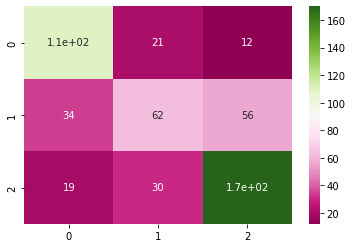

In [53]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

In [54]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.55      0.41      0.47       152
           2       0.71      0.78      0.74       219

    accuracy                           0.66       513
   macro avg       0.65      0.65      0.64       513
weighted avg       0.65      0.66      0.65       513



# More Methods:

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       142
           1       0.44      0.42      0.43       152
           2       0.67      0.70      0.68       219

    accuracy                           0.61       513
   macro avg       0.60      0.60      0.60       513
weighted avg       0.61      0.61      0.61       513



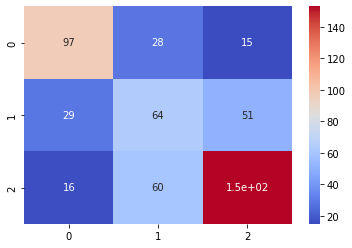

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))

In [56]:
from transformers import pipeline
import keras

ModuleNotFoundError: No module named 'transformers'

In [57]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]


ModuleNotFoundError: No module named 'torch'

In [58]:


# Assuming you have a DataFrame `df` with a text column `texts`
df = amazon[amazon["label"].isin([0, 1])]
texts = df['reviews.text']


# Initialize tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Function to predict sentiment
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    return logits.argmax().item()

# Apply the model to each text
df['predicted_sentiment'] = texts.apply(predict_sentiment)

# If you have actual sentiment labels in `df['labels']`, evaluate predictions
y_test = amazon['label']
y_pred = df['predicted_sentiment']

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
  

NameError: name 'DistilBertTokenizer' is not defined

# At this point we can observe that the accuracy is worryingly low, how the model works best on extremes, but has really big troubles in detecting the neutral labels. We will therefore train on the whole database for the sake of it and look for a better accuracy - at least for the extreme labels.

In [ ]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])

In [ ]:
amazon = amazon_reviews[['id', 'reviews.text', 'reviews.rating']]
amazon.describe()

## In case we have NaN entries for the reviews' text, we just "clean" them:

In [ ]:
amazon['reviews.text'] = amazon['reviews.text'].fillna('')

In [ ]:
def label(r):
    if r == 5.0:
        return 2
    elif r == 3.0 or r == 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)
amazon.describe()

In [ ]:
data = amazon['label']
min_bin = - 0.5
max_bin = 2.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

In [ ]:
vectorizer = CountVectorizer(analyzer = data_cleaning, dtype = np.uint8)
amazon_countvectorizer = vectorizer.fit_transform(amazon['reviews.text'])
print(amazon_countvectorizer.toarray())  

In [ ]:
X = pd.DataFrame(amazon_countvectorizer.toarray())
X

In [ ]:
y = amazon['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

In [ ]:
print(classification_report(y_test, y_predict_test))

## For more methods:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))